In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Majority of the columns are non-numeric and need to be encoded

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Married, Dependents, Self-employed, LoanAmount, Loan_Amount_Term, Credit_History columns have NaN values

### Target Variable Analysis

Target variable is Loan_Status. This is a classification problem (Target has 2 possibilities Y and N)

In [7]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [8]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

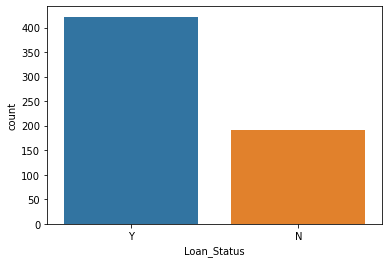

In [9]:
sns.countplot(df['Loan_Status'])

Class imbalance exists since there is huge difference in both the counts

In [10]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

### Treating the NaN values

In [11]:
for col in df.columns:
    if df[col].dtype=="object" and df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])

In [12]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df['LoanAmount'].fillna(int(df['LoanAmount'].mean()), inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])

In [16]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no Null values now

### Applying Encoding

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [18]:
df1.dtypes

Gender               int32
Married              int32
Dependents           int32
Education            int32
Self_Employed        int32
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int32
Loan_Status          int32
dtype: object

All the columns are now with numeric data type

### Resampling for solving Class imbalance

In [19]:
df2=df1
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,99,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0,1
610,1,1,3,0,0,275,0,7,5,1,0,1
611,1,1,1,0,0,431,3,162,8,1,2,1
612,1,1,2,0,0,422,0,132,8,1,2,1


In [20]:
# class count
loan_status_count_0, loan_status_count_1 = df2['Loan_Status'].value_counts()
print('loan_status_count_0, :',loan_status_count_0, '\n loan_status_count_1 : ', loan_status_count_1)

loan_status_count_0, : 422 
 loan_status_count_1 :  192


In [21]:
# Separate class
loan_status_0 = df2[df2['Loan_Status'] == 1]
loan_status_1 = df2[df2['Loan_Status'] == 0]
# print the shape of the class
print('loan status 0:', loan_status_0.shape)
print('loan status 1:', loan_status_1.shape)

loan status 0: (422, 12)
loan status 1: (192, 12)


In [22]:
loan_status_1_over = loan_status_1.sample(loan_status_count_0, replace=True)

df3 = pd.concat([loan_status_1_over, loan_status_0], axis=0)

print("total class of 1 and 0: \n",df3['Loan_Status'].value_counts())

total class of 1 and 0: 
 1    422
0    422
Name: Loan_Status, dtype: int64


In [23]:
df3.shape

(844, 12)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

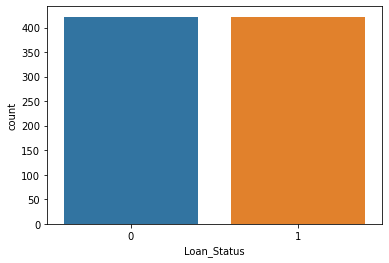

In [24]:
sns.countplot(x="Loan_Status",data=df3)

### EDA

### Univariate Analysis

### Plotting Distribution plot for checking data distribution and skewness

<AxesSubplot:xlabel='Gender', ylabel='Density'>

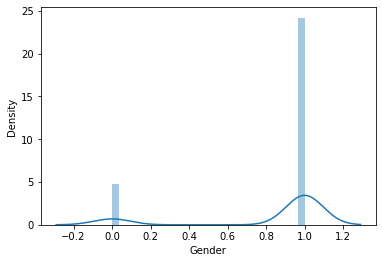

In [25]:
sns.distplot(df3['Gender'])

<AxesSubplot:xlabel='Married', ylabel='Density'>

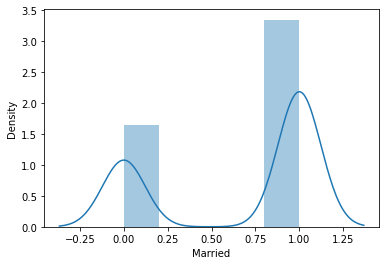

In [26]:
sns.distplot(df3['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

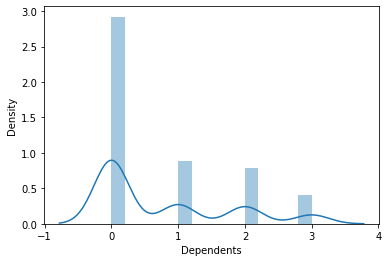

In [27]:
sns.distplot(df3['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

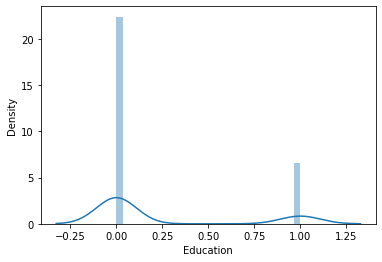

In [28]:
sns.distplot(df3['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

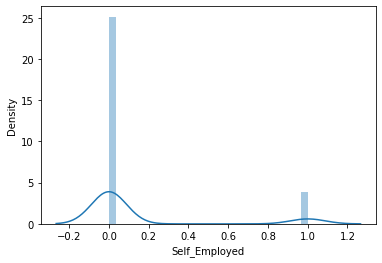

In [29]:
sns.distplot(df3['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

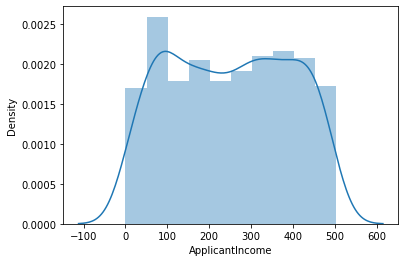

In [30]:
sns.distplot(df3['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

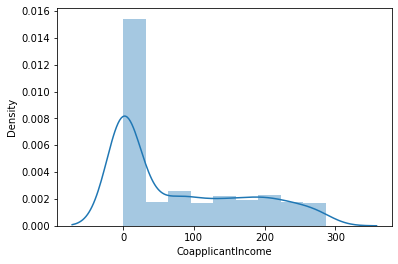

In [31]:
sns.distplot(df3['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

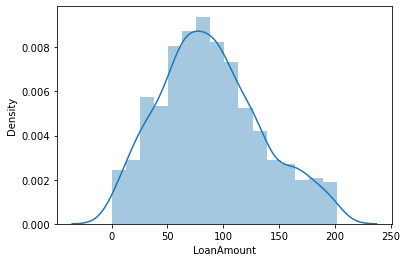

In [32]:
sns.distplot(df3['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

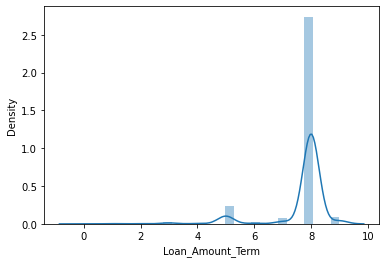

In [33]:
sns.distplot(df3['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

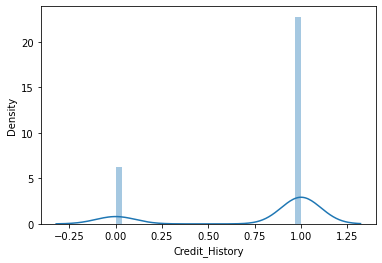

In [34]:
sns.distplot(df3['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

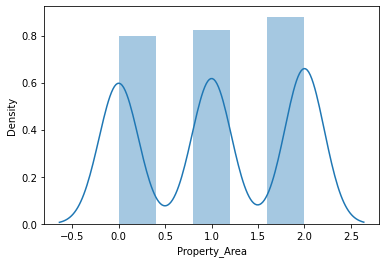

In [35]:
sns.distplot(df3['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

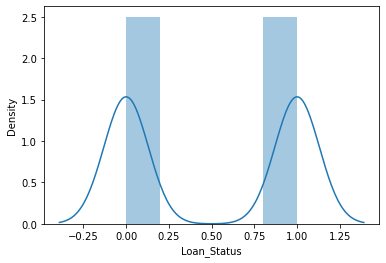

In [36]:
sns.distplot(df3['Loan_Status'])

All the columns have skewness and needs to be handled

### Multivariate Analysis

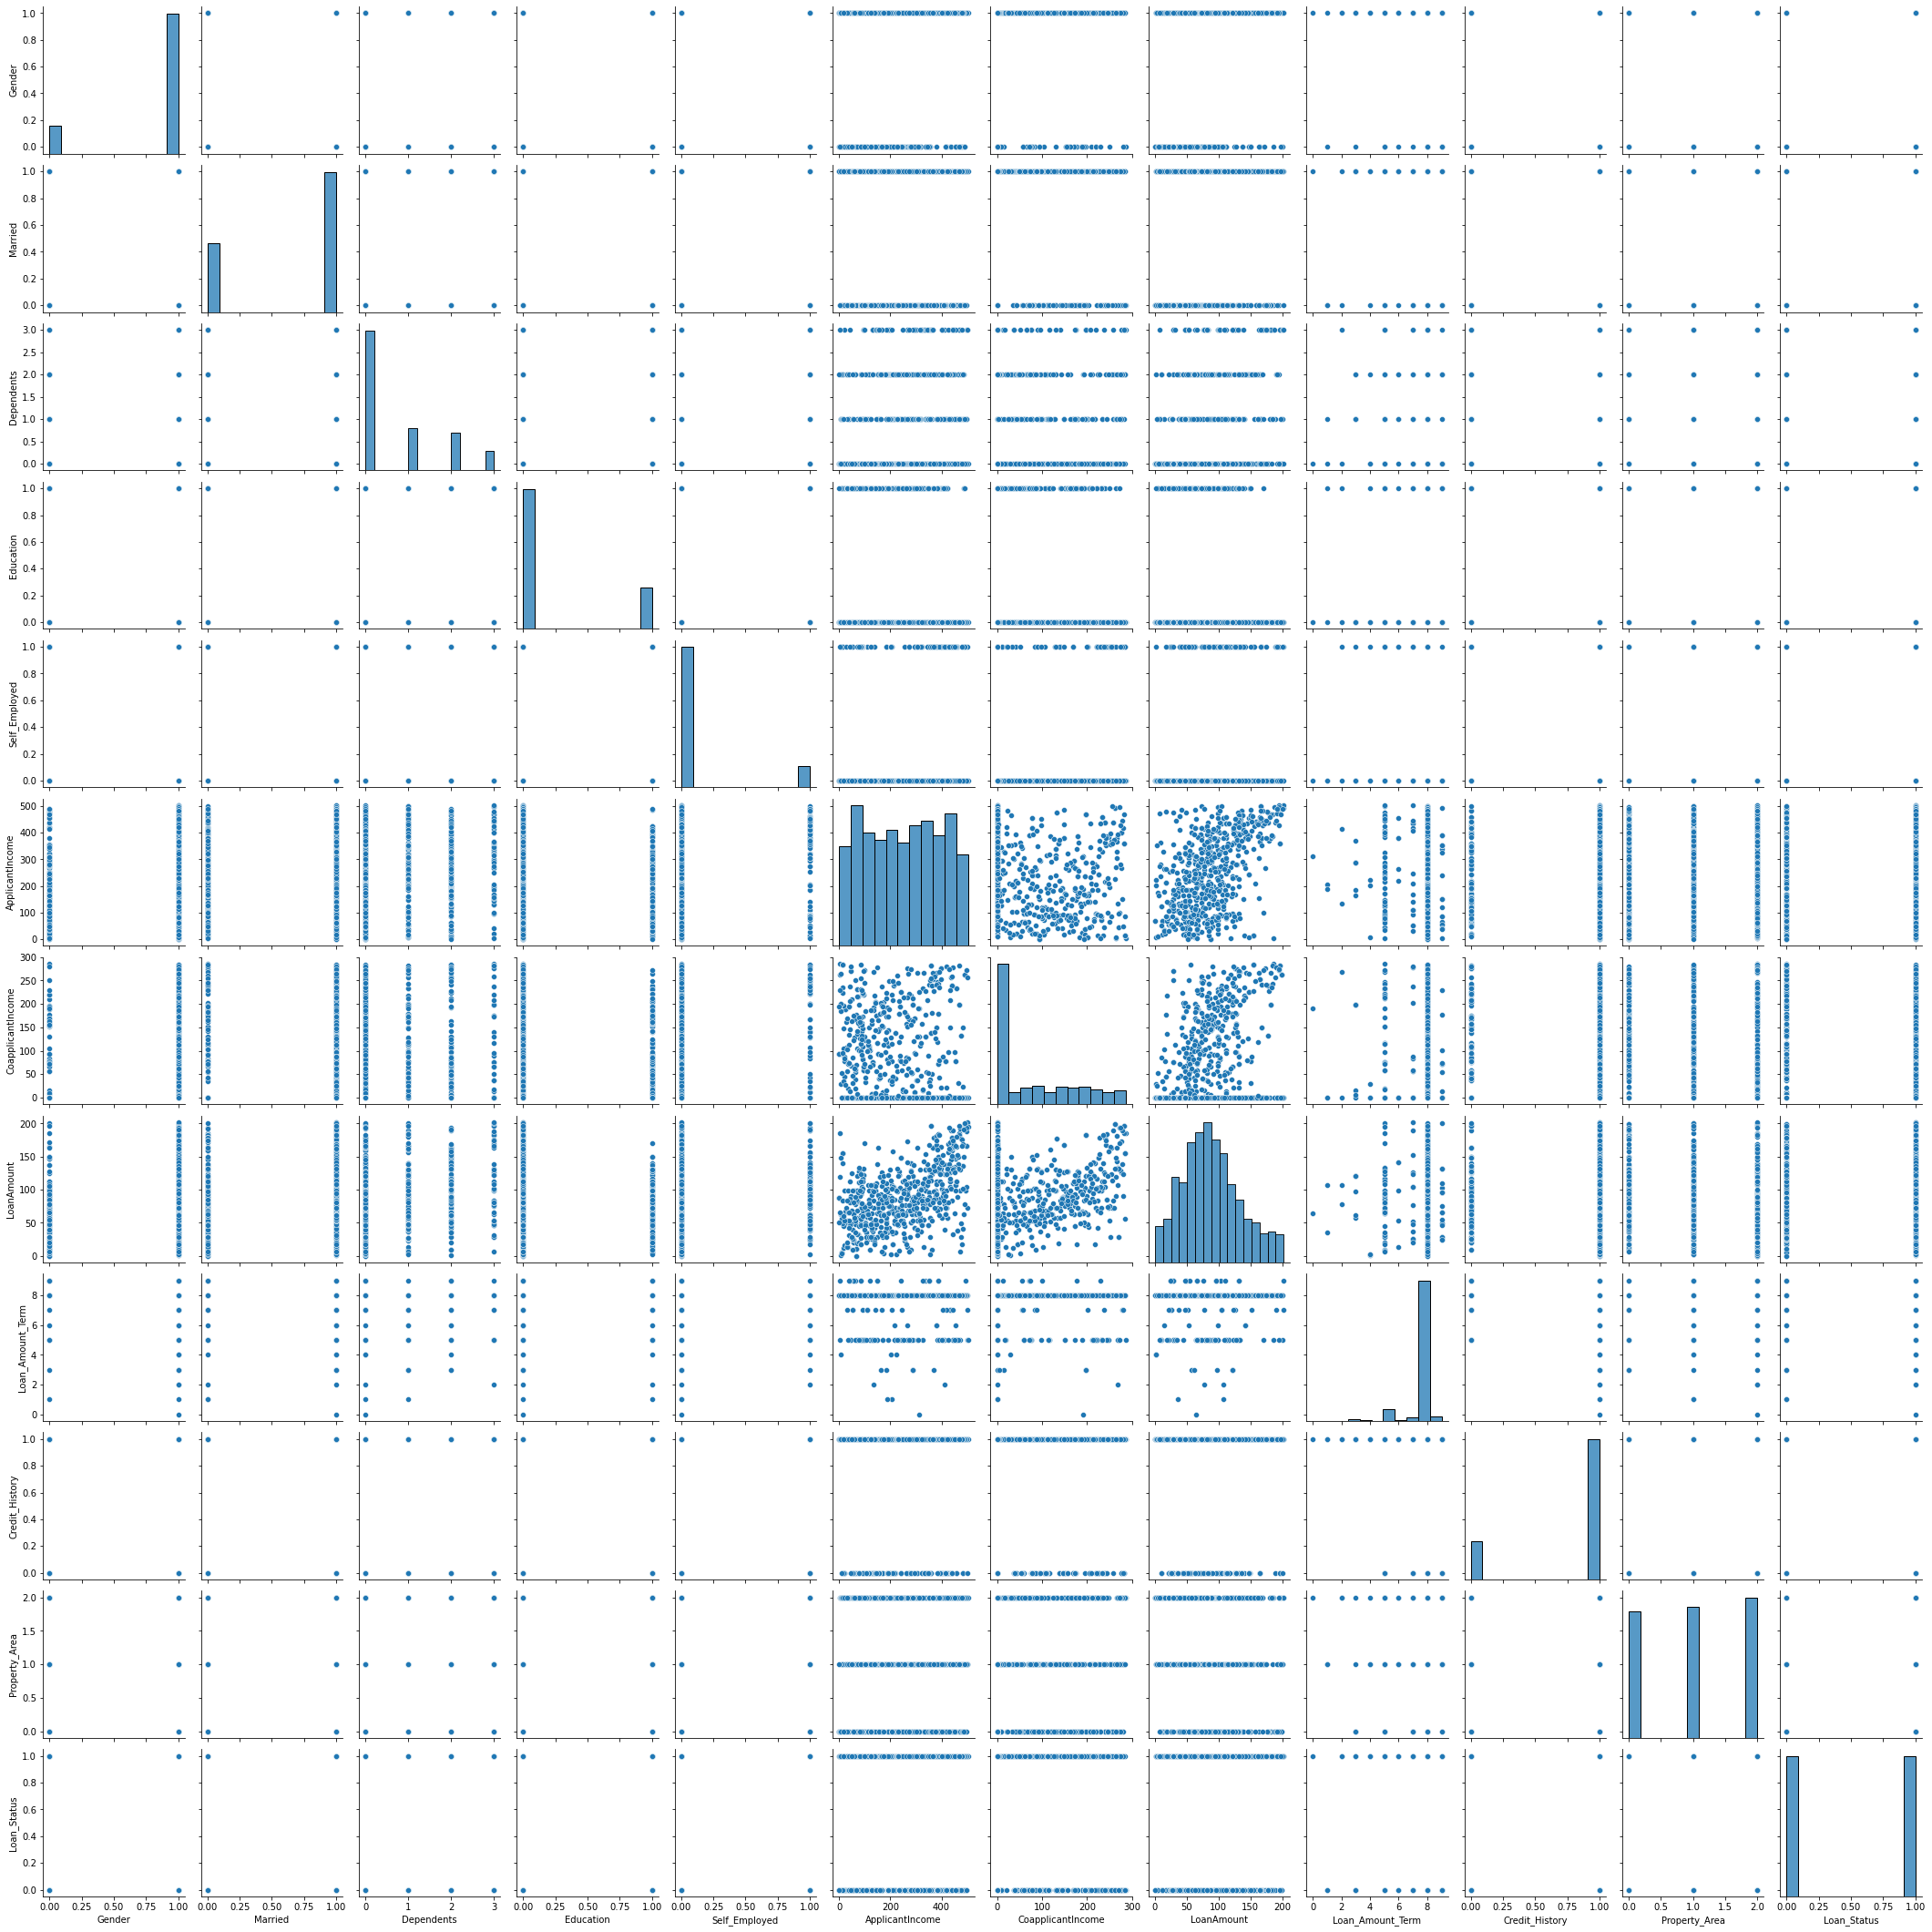

In [37]:
sns.pairplot(df3)

### Plotting box plot for checking Outliers

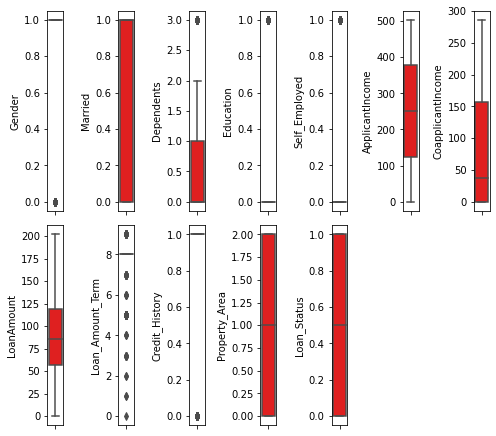

In [38]:
collist=df3.columns.values
ncol= 7
nrows= 7

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df3[collist[i]], color='red', orient='x')
    plt.tight_layout()

Gender, Dependents, Self Employed, Loan_Amount_Term, Credit_History columns have outliers

### Removing Skewness

In [39]:
df3.skew()

Gender              -1.799706
Married             -0.721627
Dependents           1.036986
Education            1.302436
Self_Employed        2.154088
ApplicantIncome     -0.000624
CoapplicantIncome    0.738397
LoanAmount           0.379451
Loan_Amount_Term    -3.161247
Credit_History      -1.385318
Property_Area       -0.061252
Loan_Status          0.000000
dtype: float64

### Removing Outliers

In [40]:
from scipy.stats import zscore

z=np.abs(zscore(df3))

df4=df3[(z<3).all(axis=1)]

In [41]:
df4.shape

(828, 12)

In [42]:
df3.shape

(844, 12)

In [43]:
Loss_percentage=(844-830)/844*100
print(Loss_percentage)

1.6587677725118484


outliers removal using ZScore is deleting less than 8% data. So proceeding with new df.

In [44]:
cor=df4.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.372709,0.177971,0.088794,-0.006365,0.071341,0.191960,0.173685,-0.107274,-0.018260,-0.024432,-0.033487
Married,0.372709,1.000000,0.290021,0.059702,0.019143,0.007716,0.245411,0.193565,-0.132248,-0.027536,0.001980,0.026504
Dependents,0.177971,0.290021,1.000000,0.024922,0.023069,0.135002,-0.000623,0.205425,-0.087930,-0.060562,0.040949,0.011413
Education,0.088794,0.059702,0.024922,1.000000,0.024512,-0.194938,-0.051121,-0.167844,-0.170871,-0.072658,-0.033841,-0.082135
Self_Employed,-0.006365,0.019143,0.023069,0.024512,1.000000,0.149434,-0.012207,0.093772,-0.050060,-0.015649,-0.021110,-0.013288
ApplicantIncome,0.071341,0.007716,0.135002,-0.194938,0.149434,1.000000,-0.219540,0.526412,0.045114,0.038616,-0.058945,-0.019048
CoapplicantIncome,0.191960,0.245411,-0.000623,-0.051121,-0.012207,-0.219540,1.000000,0.324413,-0.099558,-0.020680,-0.066707,0.002438
LoanAmount,0.173685,0.193565,0.205425,-0.167844,0.093772,0.526412,0.324413,1.000000,0.038860,0.008639,-0.079072,-0.055939
Loan_Amount_Term,-0.107274,-0.132248,-0.087930,-0.170871,-0.050060,0.045114,-0.099558,0.038860,1.000000,0.095039,-0.060674,-0.000663
Credit_History,-0.018260,-0.027536,-0.060562,-0.072658,-0.015649,0.038616,-0.020680,0.008639,0.095039,1.000000,-0.055712,0.488676


<AxesSubplot:>

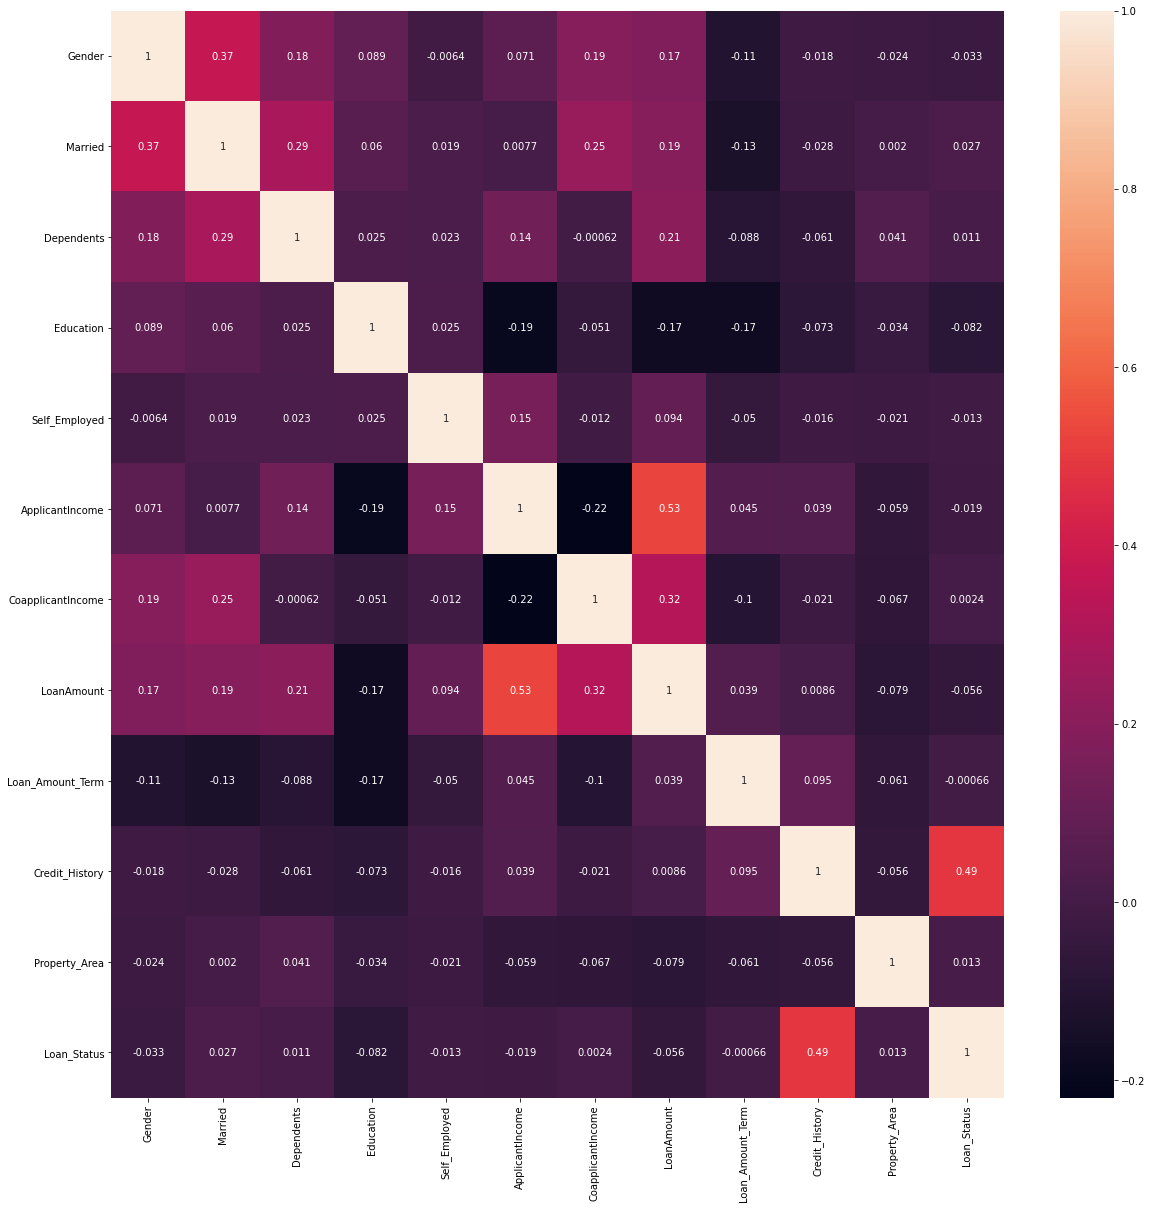

In [45]:
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

### Checking for multi collinearity

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif_data = pd.DataFrame()
vif_data["feature"] = df4.columns

In [48]:
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                            for i in range(len(df1.columns))]
print(vif_data)

              feature        VIF
0              Gender   6.334182
1             Married   3.843150
2          Dependents   1.841688
3           Education   1.336627
4       Self_Employed   1.205138
5     ApplicantIncome   7.214162
6   CoapplicantIncome   2.529805
7          LoanAmount   8.910275
8    Loan_Amount_Term  12.971246
9      Credit_History   9.295723
10      Property_Area   2.621370
11        Loan_Status   4.623913


All VIF values are below 10. So not dropping any columns.

### Dividing the data into independent(x) and dependent(y) variables

In [49]:
x=df4.drop('Loan_Status',axis=1)
y=df4['Loan_Status']

### Scaling the Data

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [51]:
maxAccu=0
maxRs=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ", maxAccu, "On random_state", maxRS)

Best Accuracy is  0.9076305220883534 On random_state 1488


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=1899)

### Normalisation

In [53]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)

In [54]:
print(new_xtrain)

[[1.         1.         1.         ... 0.75       1.         0.        ]
 [1.         1.         0.66666667 ... 0.75       1.         0.        ]
 [1.         1.         0.33333333 ... 0.75       1.         1.        ]
 ...
 [1.         0.         0.         ... 0.75       0.         0.5       ]
 [1.         1.         0.33333333 ... 0.75       0.         1.        ]
 [1.         1.         0.         ... 0.75       1.         0.5       ]]


In [55]:
print(new_xtest)

[[1.         0.         0.         ... 0.5        1.         0.        ]
 [1.         1.         0.         ... 0.75       1.         0.        ]
 [1.         1.         1.         ... 0.75       1.         0.5       ]
 ...
 [1.         1.         0.         ... 0.75       1.         1.        ]
 [1.         1.         0.33333333 ... 0.75       1.         0.5       ]
 [0.         0.         0.         ... 0.75       1.         1.        ]]


### Model Creation

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
DTC=DecisionTreeClassifier()
DTC.fit(new_xtrain,y_train)
pred_dtc=DTC.predict(new_xtest)
acc=classification_report(y_test,pred_dtc)
print(acc)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       122
           1       0.90      0.80      0.85       127

    accuracy                           0.86       249
   macro avg       0.86      0.86      0.86       249
weighted avg       0.86      0.86      0.86       249



In [58]:
RFC=RandomForestClassifier()
RFC.fit(new_xtrain,y_train)
pred_rfc=RFC.predict(new_xtest)
acc=classification_report(y_test,pred_rfc)
print(acc)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       122
           1       0.88      0.87      0.88       127

    accuracy                           0.88       249
   macro avg       0.88      0.88      0.88       249
weighted avg       0.88      0.88      0.88       249



In [59]:
SV=SVC()
SV.fit(new_xtrain,y_train)
pred_svc=SV.predict(new_xtest)
acc=classification_report(y_test,pred_svc)
print(acc)

              precision    recall  f1-score   support

           0       0.87      0.58      0.70       122
           1       0.69      0.91      0.79       127

    accuracy                           0.75       249
   macro avg       0.78      0.75      0.74       249
weighted avg       0.78      0.75      0.74       249



In [60]:
GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(new_xtrain, y_train)
pred_gbc = GBC.predict(new_xtest)
gbc=classification_report(y_test,pred_gbc)
print(gbc)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       122
           1       0.79      0.85      0.82       127

    accuracy                           0.81       249
   macro avg       0.81      0.81      0.81       249
weighted avg       0.81      0.81      0.81       249



### Finding Cross Validation Score

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8538517707192407


In [63]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9142095655348668


In [64]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.4952026286966046


In [65]:
print(cross_val_score(GBC,x,y,cv=5).mean())

0.7765461847389558


### Difference between model accuracy and cv score

DTC: 88-85=3

RFC: 86-91=-5

SV:  75-50=25

GBC: 81-78=3

Random Forest Classifier has least difference and highest accuracy. Hence considering the same

### Hyper Parameter Tuning

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [67]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [68]:
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA0475F790>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA030F78E0>})

In [69]:
print("Tuned Ramdom forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Ramdom forest Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1}
Best score is 0.9190653523183643


### Predictions

In [70]:
preds = RFC.predict(new_xtest)
print(preds[:30])
print(y_test[:30].values)

[0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0]
[0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0]


First row is predicted values and second row Actual values. Most of the predicted and actual values are matching.

### Final Model Creation

In [71]:
Final_mod = RandomForestClassifier(criterion= 'entropy', max_depth = None, max_features = 2, min_samples_leaf = 1)
Final_mod.fit(new_xtrain, y_train)
pred = Final_mod.predict(new_xtest)
acc=accuracy_score(y_test, pred)
print(acc*100)

87.55020080321285


In [72]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

RFC.fit(new_xtrain,y_train)
probs = RFC.predict(new_xtest)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
auc = auc(fpr, tpr)
print('AUC: %.3f' %auc)

AUC: 0.876


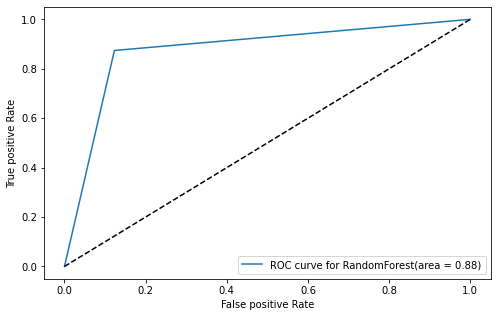

In [73]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve for RandomForest(area = %0.2f)' % auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc='lower right')

### Confusion Matrix

Text(91.68, 0.5, 'Predicted Loan status')

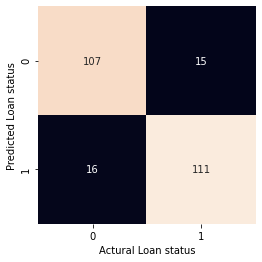

In [74]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural Loan status')
plt.ylabel('Predicted Loan status')

There are 10 false positives and 10 false negatives

### Saving the Final Model

In [75]:
import joblib
joblib.dump(Final_mod,"Loan_Status_Project.pkl")

['Loan_Status_Project.pkl']